In [112]:
from playground_swing_rl.env.playground_swing import PlaygroundSwingEnv
import gymnasium
import numpy as np
# Create the environment with rendering enabled
env = gymnasium.make("PlaygroundSwingEnv-v0", max_episode_steps=500, goal='rotation')
data = []
# Reset the environment to get the initial observation
obs, info = env.reset(options={'theta_dot': 6})
# obs, info = env.reset()
terminated = False
truncated = False
# Run a short demo with random actions
while not (terminated or truncated):
    action = env.action_space.sample()  # Take a random action
    obs, reward, terminated, truncated, info = env.step(np.array([0,0]))
    data.append({'theta': obs[0], 'theta_dot': obs[1], 'phi': obs[2], 'phi_d': obs[3], 'psi': obs[4], 'psi_d': obs[5], 'reward': reward, 't':env.unwrapped.t})



38.449660691528614


<Axes: >

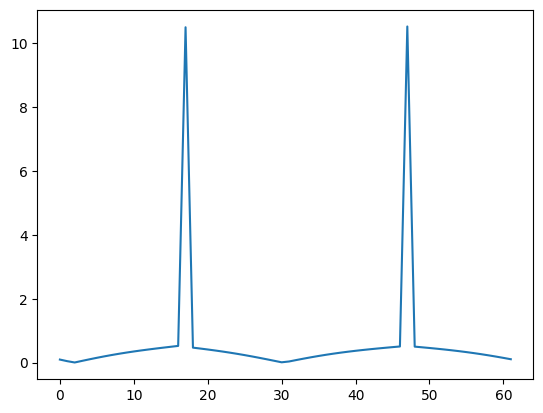

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(data)
print(df['reward'].sum())
df['reward'].plot()
# plt.plot((1/5)*df['reward'])
# print(((1/abs(df['theta_dot'][0]))*df['reward']).sum())